In [32]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import sys

import seaborn as sns
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#shap.initjs()

In [33]:
df = pd.read_csv('/content/performance.csv', delimiter = ",")

In [34]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#Preprocessing of features

In [36]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [37]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [38]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [39]:
df['NationalITy'].nunique()

14

In [40]:
df['Topic'].nunique()

12

In [41]:
df['Semester'].nunique()

2

In [42]:
df['Class'].unique()

array(['M', 'L', 'H'], dtype=object)

In [43]:
df['gender'] = df['gender'].astype('category')
df['NationalITy'] = df['NationalITy'].astype('category')
df['PlaceofBirth'] = df['PlaceofBirth'].astype('category')
df['StageID'] = df['StageID'].astype('category')
df['GradeID'] = df['GradeID'].astype('category')
df['SectionID'] = df['SectionID'].astype('category')
df['Topic'] = df['Topic'].astype('category')
df['Semester'] = df['Semester'].astype('category')
df['Relation'] = df['Relation'].astype('category')
df['raisedhands'] = df['raisedhands'].astype('category')
df['Discussion'] = df['Discussion'].astype('category')
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].astype('category')
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].astype('category')
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].astype('category')
df['Class'] = df['Class'].astype('category')


In [44]:
cat_cols = df.select_dtypes(['category']).columns # Storing names of all categorical columns in cat_cols
cat_cols

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [45]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.cat.codes) # Converting the categorical columns into numerical columns
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,18,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,23,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,28,0,0,0,1
3,1,4,4,2,1,0,7,0,0,29,25,5,33,0,0,0,1
4,1,4,4,2,1,0,7,0,0,35,50,12,46,0,0,0,2


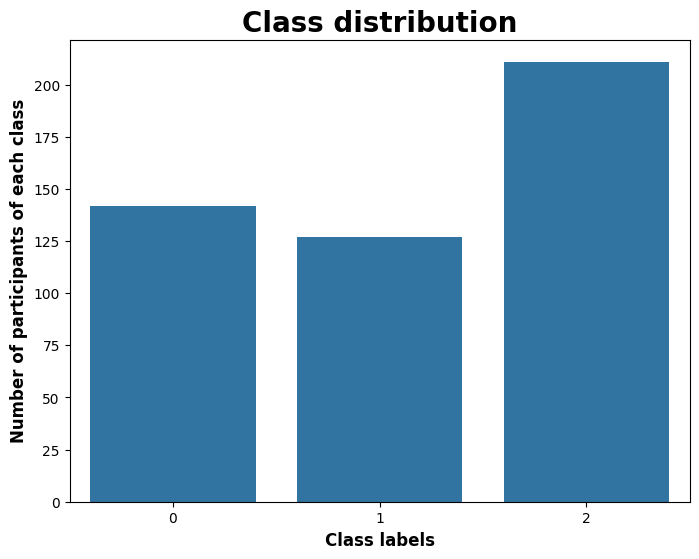

In [46]:
fig, ax = plt.subplots(figsize = (8 , 6))
sns.countplot(data=df, x="Class")
ax.set_xlabel( "Class labels" , size = 12,  weight='bold')

# Set label for y-axis
ax.set_ylabel( "Number of participants of each class" , size = 12,  weight='bold')

# Set title for plot
ax.set_title( "Class distribution" , size = 20,  weight='bold')

# Display figure
plt.show()

<Axes: xlabel='Class', ylabel='count'>

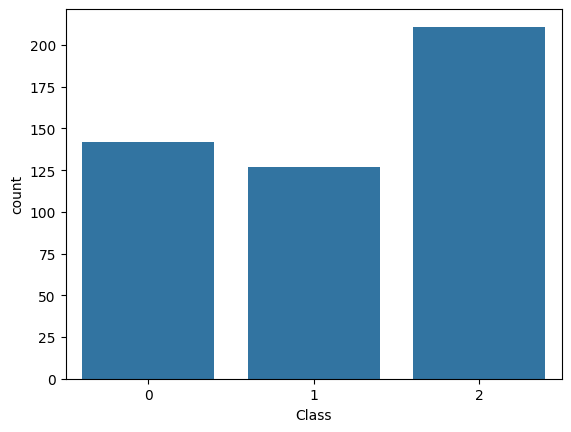

In [47]:
import seaborn as sns
sns.countplot(data=df, x="Class")

In [53]:
x = df.drop(['Class'], axis = 1)
y = df['Class']

In [49]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler


# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled, columns = x.columns)

## ✅ Feature Selection in Machine Learning

Feature selection improves model performance, reduces overfitting, and enhances interpretability. Below are the **three main types** of feature selection methods:

---

### 🔹 1. Filter Methods

**Examples:**
- Correlation
- Chi-Square Test
- ANOVA F-score

**When to Use:**
- ✅ Fast
- ✅ Model-agnostic
- ✅ Useful for preprocessing

**Python Tools:**
- `SelectKBest`
- `VarianceThreshold`
- `pandas.corr()`

---

### 🔹 2. Wrapper Methods

**Examples:**
- RFE (Recursive Feature Elimination)
- Forward Selection
- Backward Elimination

**When to Use:**
- ✅ Higher accuracy
- ⚠️ Slower
- ⚠️ Better for small datasets

**Python Tools:**
- `sklearn.feature_selection.RFE`
- `SequentialFeatureSelector` from `sklearn`

---

### 🔹 3. Embedded Methods

**Examples:**
- Lasso (L1 Regularization)
- Ridge (L2 Regularization)
- Tree-based methods (e.g., Random Forest, XGBoost)

**When to Use:**
- ✅ Built into the model
- ✅ Works well with large feature spaces
- ✅ Supports linear and nonlinear data

**Python Tools:**
- `Lasso`, `Ridge` from `sklearn.linear_model`
- `RandomForestClassifier`
- `XGBoost`, `LightGBM`

---


##Filter based : Correlation analysis

This code performs correlation analysis on a DataFrame df, visualizes the correlation matrix, and then selects features that are correlated (above a threshold) with the target variable 'Class'.

,Class
Relation,0.272111
raisedhands,0.225460
VisITedResources,0.161748
StudentAbsenceDays,0.199083
Class,1.000000


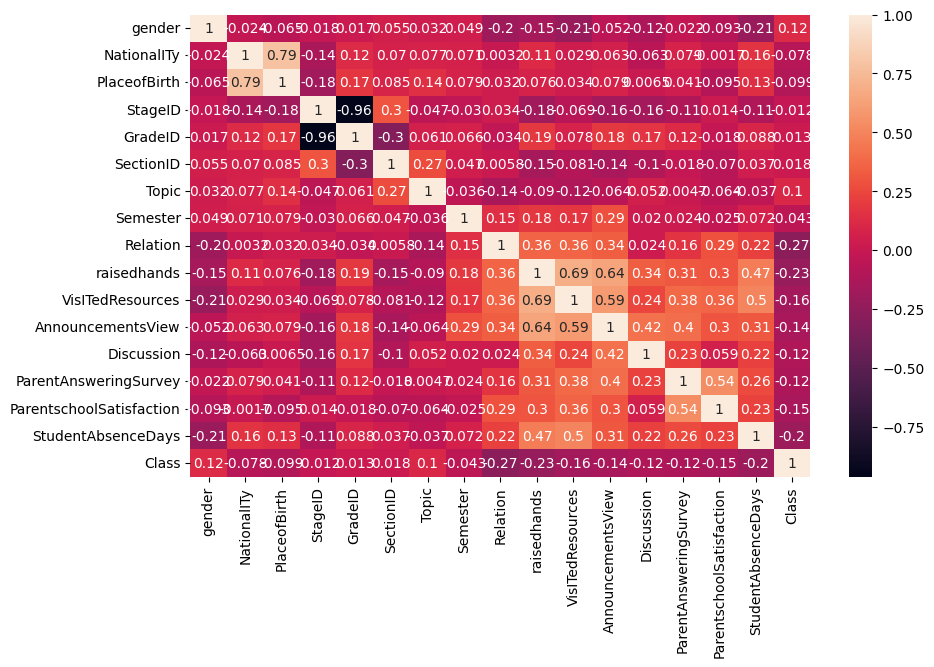

In [50]:
cor = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.heatmap(cor,annot = True)
th = 0.5
a = abs(cor['Class'])
result = a[a>0.15]
result

#Wrapper based method

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 1: Define model
model = LogisticRegression(max_iter=1000)

# Step 2: Fit RFE on full X, not X_rfe
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Step 3: Apply the support mask
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:\n", selected_features)


Selected Features by RFE:
 Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


#Embedded Methods

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances with their respective column names
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort features based on their importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select the top-K features based on mutual information scores
K = 2
top_K_features = importance_df ['Feature'][:5]

print(f"\nTop-{K} features:")
print(top_K_features)


Top-2 features:
10      VisITedResources
9            raisedhands
11     AnnouncementsView
15    StudentAbsenceDays
12            Discussion
Name: Feature, dtype: object


Generally one method is used to find the important features (such as may be filter based method) and other is used to confirm the finding of first method (such as may be wrapper based method)
